In [47]:
options(repr.plot.width=8, repr.plot.height=5, jupyter.plot_mimetypes='image/svg+xml')
source('common.r')
out <- function(obj) write(obj, stdout())

In [48]:
d <- data.retwis.socc(where="(name = 'v1.1' or ccmode = 'redis')")
out("rows: " + nrow(d))

The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: simple#1#off#0, better#0#off#0, better#1#off#0, better#0#on#0, better#1#on#0, redis#0#off#0
The following `from` values were not present in `x`: simple:1


rows: 137


In [49]:
unique(x(d$ccmode,d$combining,d$phasing,d$disable_txns))

[1] "redis#0#NA#0"   "rw#0#off#0"     "simple#0#off#0" "rw#0#off#1"    
[5] "rw#0#on#0"      "simple#0#on#0"  "simple#1#on#0"

In [50]:

modes <- c(RW+PH, COMM, COMM+PH, COMB+PH, NOTXN, REDIS)

d <- subset(d, cc_ph %in% modes)
d$cc_ph <- factor(d$cc_ph, levels = rev(modes))

d$x <- d$threads * num(d$nclients)
d$label <- d$threads * num(d$nclients) + "x" + d$rate
d$facet <- with(d, workload) # + "\n" + timeout_scaling)

s <- subset(d, async == 0 
            & txn_failed < 200
            & total_time > 60 & total_time < 65 
            & (phasing == 'on' | disable_txns == 1 | cc_ph == REDIS)
           )
out("rows: " + nrow(s))

rows: 76


In [60]:
#sql("SELECT DISTINCT ccmode, nclients, threads, mix, rate, alpha, scale FROM d")

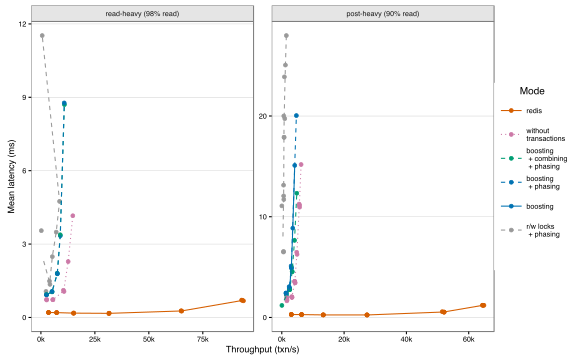

In [59]:
ggplot(d, aes(
    x = throughput,
    y = avg_latency_ms,
    group = cc_ph, fill = cc_ph, color = cc_ph, linetype = cc_ph
))+
  xlab('Throughput (txn/s)')+ylab('Mean latency (ms)')+
  geom_point()+
  # geom_text(aes(label=label), size=1.7)+
  # scale_x_continuous(labels=si.labels())+
  scale_x_continuous(labels = function(x){ x/1000+'k' })+
  # geom_point()+
  geom_mean_path(d, throughput, avg_latency_ms, .(x,facet,cc,phasing,cc_ph))+
  expand_limits(y=0)+
  facet_wrap(~facet, scales="free")+
  # cc_scales()+phasing.linetype()+
  cc_ph_scales()+
  # coord_cartesian(ylim=c(0,100))+
  my_theme() #+theme(legend.position='bottom')

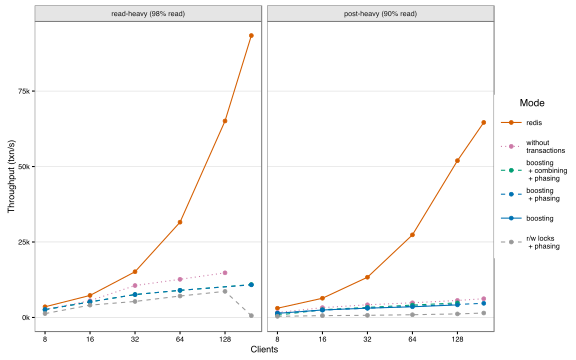

In [56]:
ggplot(subset(d), aes(
    x = x,
    y = throughput,
    group = cc_ph, fill = cc_ph, color = cc_ph, linetype = cc_ph
  ))+
  xlab('Clients')+ylab('Throughput (txn/s)')+
  stat_summary(geom='line', fun.y=mean)+
  stat_summary(geom='point', fun.y=mean)+  
  scale_x_continuous(trans=log2_trans(), breaks=c(8,16,32,64,128,256,384))+
  scale_y_continuous(labels = function(x){ x/1000+'k' })+
  expand_limits(x=0, y=0)+
  facet_wrap(~facet)+
  cc_ph_scales(guide = guide_legend(nrow = 6))+
  my_theme()